<a href="https://colab.research.google.com/github/josiemerson/learning_python/blob/master/Aprendendo_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from fbprophet import Prophet

In [ ]:
import numpy as np
dataset = np.array(['paul', 'jacob', 'vince', 'paul', 'miky', 'larence', 'warren'])
print(dataset == 'paul')

[ True False False  True False False False]


In [ ]:
arr = np.eye(5)
arr[arr != 1] = -1
arr

array([[ 1., -1., -1., -1., -1.],
       [-1.,  1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1.],
       [-1., -1., -1.,  1., -1.],
       [-1., -1., -1., -1.,  1.]])

In [ ]:
covid = pd.read_csv('https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/covid_19_data.csv')


In [ ]:
covid.tail()
covid  = covid.rename(columns={'ObservationDate' : 'Data', 'Country/Region' : 'Pais', 'Province/State': 'Estado', 'Last Update' : 'Ultima atualização' , 'Confirmed': 'Confirmado', 'Deaths' : 'Mortes', 'Recovered':'Recuperados'	})
covid.tail()
mortes = covid.groupby('Data').sum()['Mortes'].reset_index()

In [ ]:
mortes.columns = ['ds', 'y']
mortes.tail()


,ds,y
58,03/20/2020,11299.0
59,03/21/2020,12973.0
60,03/22/2020,14623.0
61,03/23/2020,16497.0
62,03/24/2020,18615.0


In [ ]:
mortes['ds'] = pd.to_datetime(mortes['ds'])
mortes.tail()

,ds,y
58,2020-03-20,11299.0
59,2020-03-21,12973.0
60,2020-03-22,14623.0
61,2020-03-23,16497.0
62,2020-03-24,18615.0


In [ ]:
dias = 30

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(mortes)
futuro = m.make_future_dataframe(periods=dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro.tail(dias)

,ds
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30
69,2020-03-31
70,2020-04-01
71,2020-04-02
72,2020-04-03


In [ ]:
previsao = m.predict(futuro)
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-471.486880,-1779.986288,701.390605,-471.486880,-471.486880,-55.129509,-55.129509,-55.129509,-55.129509,-55.129509,-55.129509,0.0,0.0,0.0,-526.616388
1,2020-01-23,-382.791789,-1685.488532,772.223004,-382.791789,-382.791789,-115.654700,-115.654700,-115.654700,-115.654700,-115.654700,-115.654700,0.0,0.0,0.0,-498.446489
2,2020-01-24,-294.096699,-1615.281489,788.738792,-294.096699,-294.096699,-96.980478,-96.980478,-96.980478,-96.980478,-96.980478,-96.980478,0.0,0.0,0.0,-391.077176
3,2020-01-25,-205.401608,-1468.017930,985.940009,-205.401608,-205.401608,-58.550199,-58.550199,-58.550199,-58.550199,-58.550199,-58.550199,0.0,0.0,0.0,-263.951807
4,2020-01-26,-116.706517,-1270.346447,1168.240502,-116.706517,-116.706517,-3.695994,-3.695994,-3.695994,-3.695994,-3.695994,-3.695994,0.0,0.0,0.0,-120.402510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2020-04-19,38704.604532,34227.416395,43019.750874,34614.105966,42984.423244,-3.695994,-3.695994,-3.695994,-3.695994,-3.695994,-3.695994,0.0,0.0,0.0,38700.908538
89,2020-04-20,39597.064963,34876.862600,44451.970191,35210.242692,44154.727103,94.922877,94.922877,94.922877,94.922877,94.922877,94.922877,0.0,0.0,0.0,39691.987840
90,2020-04-21,40489.525394,35758.104744,45762.883668,35829.860396,45421.705234,235.088001,235.088001,235.088001,235.088001,235.088001,235.088001,0.0,0.0,0.0,40724.613394
91,2020-04-22,41381.985825,36202.543944,46470.940074,36450.823534,46551.291722,-55.129509,-55.129509,-55.129509,-55.129509,-55.129509,-55.129509,0.0,0.0,0.0,41326.856316


In [ ]:
previsao[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
63,2020-03-25,15171.494954,16337.964249,17548.490765
64,2020-03-26,15973.972610,17169.899489,18345.575031
65,2020-03-27,16846.835302,18081.034142,19260.580036
66,2020-03-28,17750.645053,19011.924852,20203.455026
67,2020-03-29,18719.432821,19959.239488,21251.074377
68,2020-03-30,19667.189542,20950.318790,22211.604820
69,2020-03-31,20613.520353,21982.944345,23307.452830
70,2020-04-01,21233.933070,22585.187266,23989.874422
71,2020-04-02,21809.901420,23417.122506,24870.662846
72,2020-04-03,22743.214119,24328.257159,25840.592481


Previsão de **Mortes** em **30 Dias** no mundo.

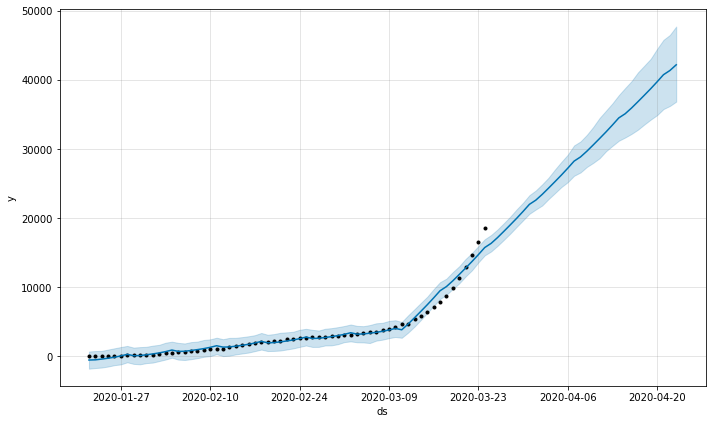

In [ ]:
confirmed_forecast_plot = m.plot(previsao)

In [ ]:
import numpy as np
np.random.randint(1, 61, (10, 1, 6))

array([[[31, 18, 22,  1, 24, 38]],

       [[42, 24, 44, 15, 16, 12]],

       [[29, 46, 32,  4, 42, 58]],

       [[32, 13, 48, 13, 50, 44]],

       [[21, 11, 13, 30, 11, 50]],

       [[18, 59, 22, 47, 53, 14]],

       [[32, 17,  6, 49, 55, 20]],

       [[43,  8,  7, 47,  4, 39]],

       [[29, 58, 12, 35,  5, 29]],

       [[60,  4, 56, 60, 11,  5]]])

In [ ]:
a1D = np.random.randint(0, 10, 10)
a1D

array([8, 2, 3, 7, 4, 6, 6, 3, 5, 3])

In [ ]:
#A propriedade shape retorna o formato do array
a1D.shape

(10,)

In [ ]:
#A propriedade ndim retorna o número de dimensões do array
a1D.ndim

1

In [ ]:
#Verificando o tamanho das dimensões de um array - len
arr1D = np.random.randint(0, 10, 10) # Cria array de 1 dimensão
arr2D = np.random.randint(0, 10, (3, 4)) # Cria array de duas dimensões 3 linhas e 4 colunas
arr3D = np.random.randint(0, 10, (3, 2, 4)) # Cria array de 3 páginas, 2 linhas e 4 colunas

len(arr1D) # Retorna o tamanho da 1ª dimensão (quantidade de colunas)
len(arr2D) # Retorna o tomanho da 1º dimensão (quantidade de linhas)
len(arr3D) # Retorna o tomanho da 1ª dimensão  (quantidade de páginas)
len(arr3D[0]) # Retorna o tomanho da 2º dimensão (quantidade de linhas)
len(arr3D[0][0]) # Retorna o tomanho da 2º dimensão (quantidade de colunas)

4

In [ ]:
#Verificando a quantidade de elementos de um array  - size
arr1D = np.random.randint(0, 10, 10) # Cria array de 1 dimensão
arr2D = np.random.randint(0, 10, (3, 4)) # Cria array de duas dimensões 3 linhas e 4 colunas
arr3D = np.random.randint(0, 10, (3, 2, 4)) # Cria array de 3 páginas, 2 linhas e 4 colunas

arr1D.size
arr2D.size
arr3D.size
#Como verificar o tamanho
(pages, lines, columns)
(3, 2, 4) # pages * (lines * columns) = 3 * (2 * 4) = 24


24

In [ ]:
# Verificando o tipo dos elementos de um array - dtype
arr1D = np.random.randint(0, 10, 10) # Cria array de 1 dimensão
arr2D = np.random.randint(0, 10, (3, 4)) # Cria array de duas dimensões 3 linhas e 4 colunas
arr3D = np.random.random(20) # Cria array de 3 páginas, 2 linhas e 4 colunas
arr3D

array([8.11710852e-01, 7.96392768e-01, 8.95552513e-01, 4.00996966e-01,
       1.81377120e-01, 9.84200297e-01, 2.64482480e-01, 6.95873094e-01,
       5.27387647e-02, 9.63112281e-01, 4.74632519e-01, 8.60124768e-01,
       6.21459120e-05, 1.47498993e-02, 1.37022304e-01, 2.97761781e-01,
       8.52901970e-01, 1.50891184e-01, 9.83488491e-01, 8.29501581e-01])

In [ ]:
arr1D.dtype # 10

dtype('int64')

In [ ]:
arr1D.dtype.name

'int64'

In [ ]:
arr2D.dtype

dtype('int64')

In [ ]:
arr2D.dtype.name

'int64'

In [ ]:
arr3D.dtype

dtype('int64')

In [ ]:
arr3D.dtype.name

'int64'

In [ ]:
arr1D = np.random.randint(0, 10, 10) # Cria array de 1 dimensão
arr1D

array([7, 7, 1, 0, 3, 6, 0, 3, 9, 8])

In [ ]:
arr2D = np.random.randint(0, 101, (4, 5)) # Cria array de duas dimensões 3 linhas e 4 colunas
arr2D

array([[17, 10, 21, 45, 33],
       [75, 60, 46, 19, 94],
       [ 4, 92, 47, 65, 37],
       [22, 73, 85, 80,  1]])

In [ ]:
arr3D = np.random.random((3, 4, 5)) # Cria array de 3 páginas, 2 linhas e 4 coluna
arr3D

array([[[0.71271269, 0.87013654, 0.02957158, 0.9059113 , 0.17075139],
        [0.99364736, 0.2752955 , 0.22855317, 0.89757172, 0.38045871],
        [0.43530588, 0.43844804, 0.62591172, 0.62941398, 0.20254397],
        [0.44620397, 0.89282112, 0.49988347, 0.81901135, 0.19628105]],

       [[0.79269876, 0.51886651, 0.49748297, 0.86593245, 0.9132884 ],
        [0.86226052, 0.15236774, 0.84634765, 0.01689208, 0.86458166],
        [0.11224612, 0.60543798, 0.72651086, 0.0643186 , 0.14688707],
        [0.95941767, 0.58830666, 0.17372397, 0.83587319, 0.41333809]],

       [[0.72029796, 0.6064659 , 0.71534055, 0.41286509, 0.36947996],
        [0.02845134, 0.44674033, 0.35239374, 0.67781687, 0.88816395],
        [0.34842762, 0.97677892, 0.64258411, 0.88815591, 0.91872395],
        [0.49260422, 0.55125263, 0.5550808 , 0.92051172, 0.58702118]]])

**Acessando elementos específicos**

In [ ]:
#Acessando elementos de um ndarray de 1 dimensão
arr1D

array([7, 7, 1, 0, 3, 6, 0, 3, 9, 8])

In [ ]:
# Nome_do_array[índice]
arr1D[0]

7

In [ ]:
arr1D[2]

1

In [ ]:
# pega o ultimo elemento do array n-1 para pegar o primeiro pega-se n * -1
arr1D[len(arr1D) * -1 ]
print(len(arr1D) * -1)

-10


In [ ]:
arr2D

array([[17, 10, 21, 45, 33],
       [75, 60, 46, 19, 94],
       [ 4, 92, 47, 65, 37],
       [22, 73, 85, 80,  1]])

In [ ]:
#Acessando elementos linhas e colunas
indice_lin = [0, 1, 2, 3]
indice_col = [0, 1, 2, 3]
arr2D[indice_lin, indice_col]

array([17, 60, 47, 80])

In [ ]:
arr2D

array([[17, 10, 21, 45, 33],
       [75, 60, 46, 19, 94],
       [ 4, 92, 47, 65, 37],
       [22, 73, 85, 80,  1]])

In [ ]:
# Para todo o array especifico quais colunas desejo trazer, no caso repeti a ultima coluna zero
arr2D[:,[0, 1, 2, 0]]

array([[17, 10, 21, 17],
       [75, 60, 46, 75],
       [ 4, 92, 47,  4],
       [22, 73, 85, 22]])